# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving compresive_strength_concrete (1).csv to compresive_strength_concrete (1).csv


In [6]:
df = pd.read_csv('compresive_strength_concrete (1).csv')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
df.describe().T

In [9]:
columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnance_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete_Strength'
    }
  
df.rename(columns = columns, inplace=True)

In [10]:
df

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


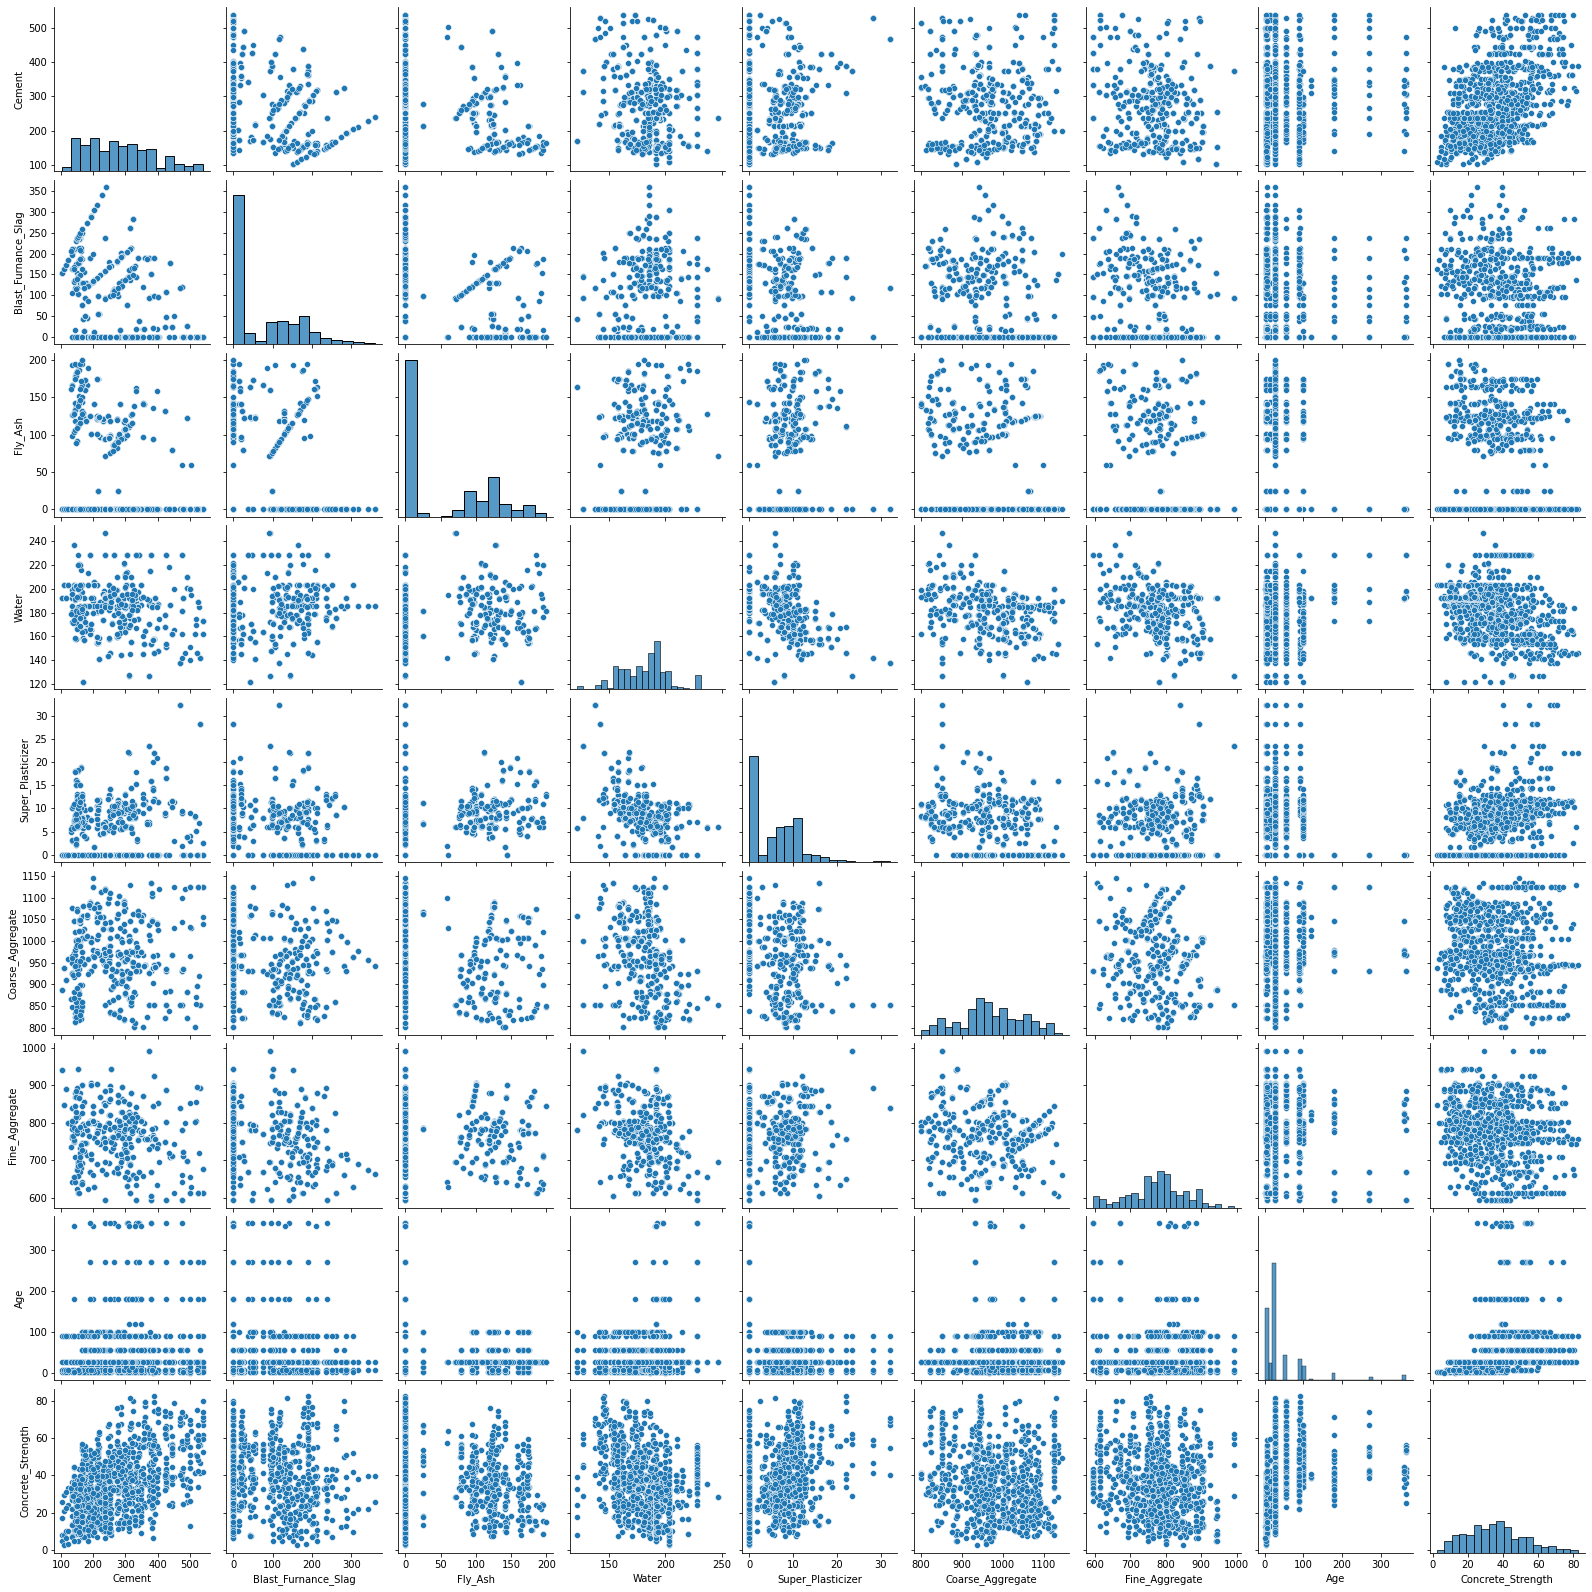

In [11]:
sns.pairplot(df)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


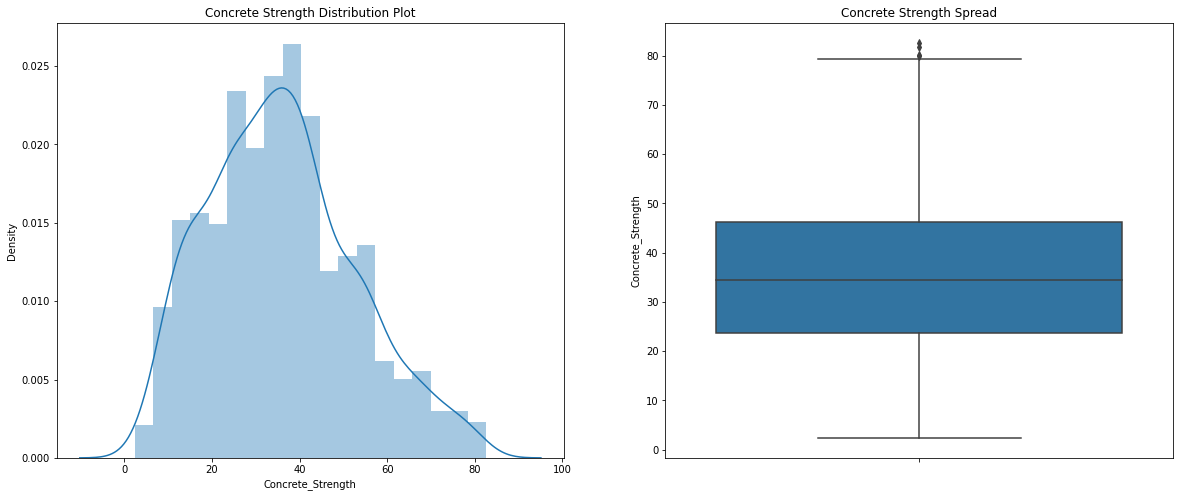

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Concrete Strength Distribution Plot')
sns.distplot(df.Concrete_Strength)

plt.subplot(1,2,2)
plt.title('Concrete Strength Spread')
sns.boxplot(y=df.Concrete_Strength)

plt.show()


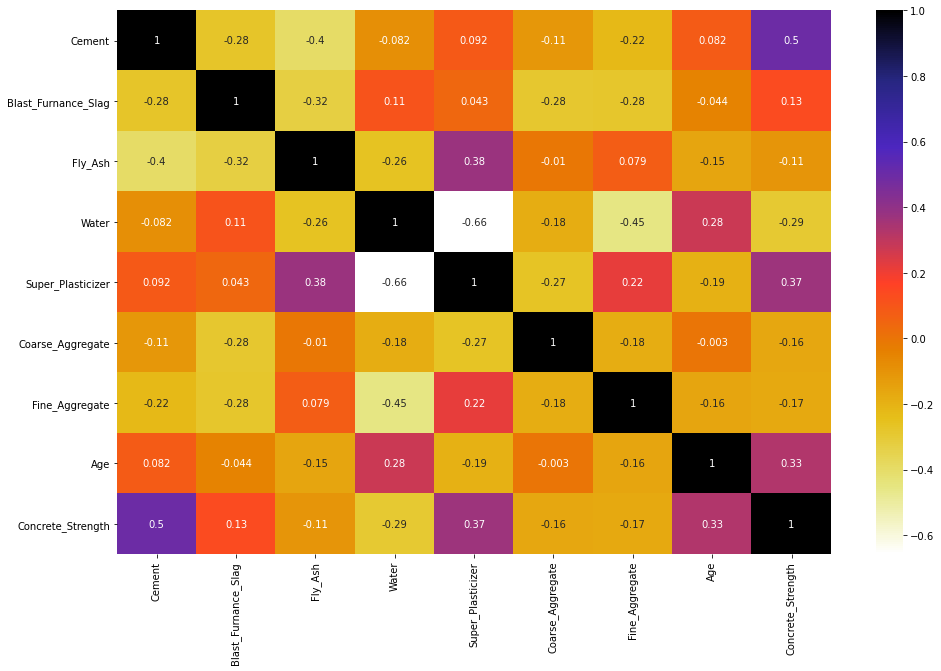

In [13]:
correlations = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlations, cmap="CMRmap_r", annot = True)
plt.show()

In [17]:
df = df.sample(frac=1)


In [18]:
train_data = df.iloc[:721,:]
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
116,374.0,189.2,0.0,170.1,10.1,926.1,756.7,28,61.09
980,147.8,175.1,0.0,171.2,2.2,1000.0,828.5,28,26.92
765,385.0,0.0,0.0,186.0,0.0,966.0,763.0,7,23.22
377,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,56,36.30
688,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33


In [19]:
test_data = df.iloc[721:,:]
test_data.head()


,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
943,151.6,0.0,111.9,184.4,7.9,992.0,815.9,28,12.18
452,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,56,48.99
455,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,56,51.26
46,349.0,0.0,0.0,192.0,0.0,1047.0,806.9,3,15.05
617,254.0,0.0,0.0,198.0,0.0,968.0,863.0,3,9.31


In [20]:
# Separating Features From Test And Train Data
copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('Concrete_Strength')
test_labels = test_data.pop('Concrete_Strength')

In [22]:
# Normalizing The Data

# Finding Mean
train_mean = np.mean(train_data, axis = 0)
# Finding Standard Deviation
train_std = np.std(train_data, axis = 0)
# Formula Used: Data - Mean / Satandard Deviation
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [23]:
model = tf.keras.models.Sequential()
model.add(Dense(12, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)


In [25]:
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,892.730164,892.730164,25.285843,1079.595459,1079.595459,28.218496,95
96,887.373779,887.373779,25.189287,1073.558228,1073.558228,28.115463,96
97,881.985046,881.985046,25.091471,1067.470947,1067.470947,28.011171,97
98,876.700500,876.700500,24.992062,1061.608765,1061.608765,27.910351,98
99,871.466125,871.466125,24.894762,1055.731201,1055.731201,27.808880,99


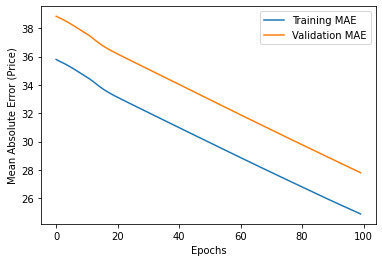

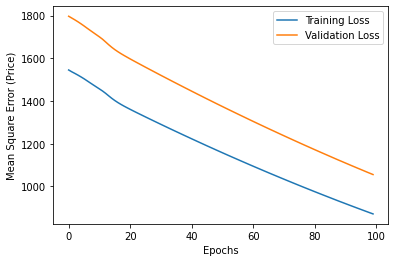

In [26]:
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training MAE')
  plt.plot(history_df['epochs'], history_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Loss')
  plt.plot(history_df['epochs'], history_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_df)

In [27]:
predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()


In [28]:
test_score = model.evaluate(test_data, test_labels)


10/10 [==============================] - 0s 2ms/step - loss: 861.8441 - mse: 861.8441 - mae: 24.1603


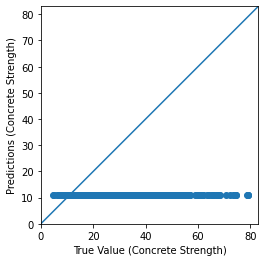

In [29]:
plt.scatter(test_labels, predictions)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

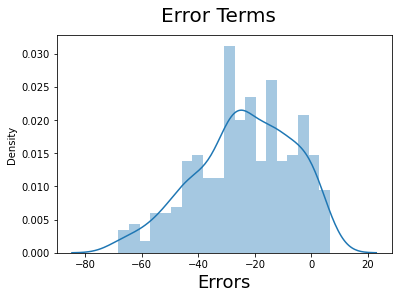

In [32]:
fig = plt.figure()
sns.distplot((predictions - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)


In [33]:
from tensorflow.keras.models import Sequential
model2 = Sequential()
# model2.add(Dense(10, activation='relu', input_shape = (22,)))
# model2.add(Dense(8, activation='relu'))
# model2.add(Dense(6, activation='relu'))
model2.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_1 = model2.fit(train_data, train_labels, epochs=500, verbose = 0, validation_split=0.2)


In [35]:
history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history_1.epoch
history_1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
495,8.170433,8.170433,2.107773,37.747921,37.747921,4.783977,495
496,7.558253,7.558253,2.054559,26.417917,26.417917,3.762318,496
497,8.129589,8.129589,2.057160,24.559025,24.559025,3.707759,497
498,7.383577,7.383577,2.030246,24.485180,24.485180,3.673152,498
499,8.878210,8.878210,2.183619,24.118767,24.118767,3.670560,499


In [36]:
predictions1 = model2.predict(test_data)
predictions1 = predictions1.flatten()

In [37]:
predictions1.shape


(309,)

In [38]:
test1_score = model2.evaluate(test_data, test_labels)


10/10 [==============================] - 0s 2ms/step - loss: 33.1598 - mse: 33.1598 - mae: 4.0801


In [39]:
print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[2]}")

Loss: 33.159786224365234
Mean Absolute Error: 4.080074310302734


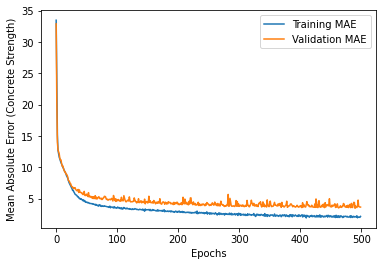

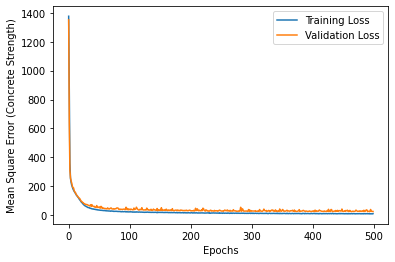

In [40]:
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training MAE')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Loss')
  plt.plot(history_1_df['epochs'], history_1_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_1_df)

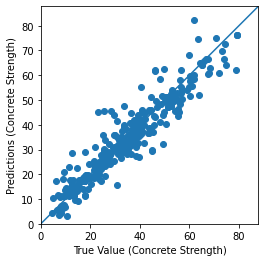

In [41]:
plt.scatter(test_labels, predictions1)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

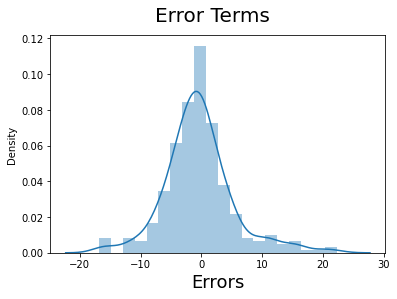

In [42]:
fig = plt.figure()
sns.distplot((predictions1 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
overcome = EarlyStopping(monitor = 'val_loss', patience = 10)

In [44]:
# Building Third Model

from tensorflow.keras.models import Sequential
model3 = Sequential()
model3.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(64, activation = 'sigmoid'))
model3.add(Dense(1,))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [45]:
history_2 = model3.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split = 0.2)


In [46]:
history_2_df = pd.DataFrame(history_2.history)
history_2_df['epochs'] = history_2.epoch
history_2_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,41.232548,41.232548,4.757812,71.943123,71.943123,6.571610,95
96,39.836090,39.836090,4.649055,69.893372,69.893372,6.325292,96
97,38.739365,38.739365,4.631214,67.786018,67.786018,6.348825,97
98,37.139408,37.139408,4.524590,64.813393,64.813393,6.166521,98
99,36.540260,36.540260,4.498784,63.075089,63.075089,6.058365,99


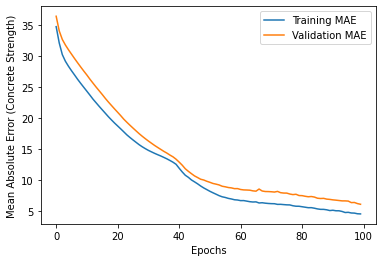

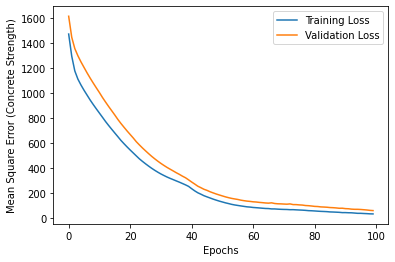

In [47]:
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['mae'], label = 'Training MAE')
  plt.plot(history_2_df['epochs'], history_2_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['loss'], label = 'Training Loss')
  plt.plot(history_2_df['epochs'], history_2_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_2_df)

In [48]:
predictions3 = model3.predict(test_data)
predictions3 = predictions3.flatten()


In [49]:
print(predictions3.shape)
print(test_labels.shape)

(309,)
(309,)


In [50]:
test2_score  = model3.evaluate(test_data, test_labels)


10/10 [==============================] - 0s 2ms/step - loss: 63.0793 - mse: 63.0793 - mae: 5.7763


In [51]:
print(f"Loss: {test2_score[0]}")
print(f"Mean Absolute Error: {test2_score[2]}")

Loss: 63.07933807373047
Mean Absolute Error: 5.776286602020264


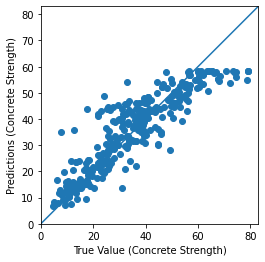

In [52]:
plt.scatter(test_labels, predictions3)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

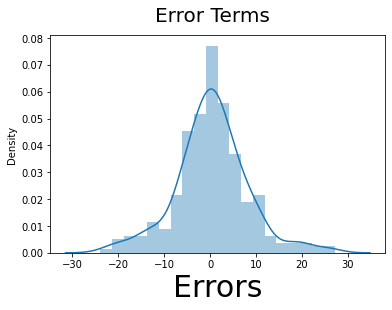

In [53]:
fig = plt.figure()
sns.distplot((predictions3 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 30)

In [54]:
model3.save('ConcreteStrengthModel.h5')


In [55]:
from google.colab import files
df.to_csv('Concrete_Strength_Assignment.csv', index=False)
files.download('Concrete_Strength_Assignment.csv')
print("Your File Was Saved Successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your File Was Saved Successfully!
